In [1]:
import random
import numpy as np
from numpy.random import randn,rand
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
# generate random data matrix
random.seed(0)
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

In [3]:
# form data from noisy linear model
wtrue = randn(d)
y = X@wtrue + .1*randn(n);

In [4]:
# look at least squares objective as a function of w
def f(w):
    return norm(y - X@w)**2
def gradf(w): 
    return 2*X.T@X@w - 2*X.T@y

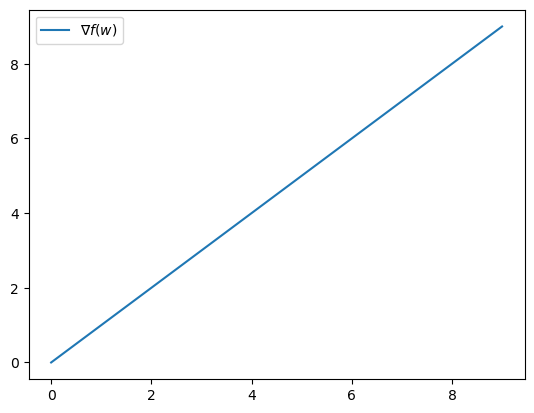

In [5]:
# plot can use LaTeX 
plt.plot(range(10), range(10), label=r"$\nabla f(w)$")
plt.legend()

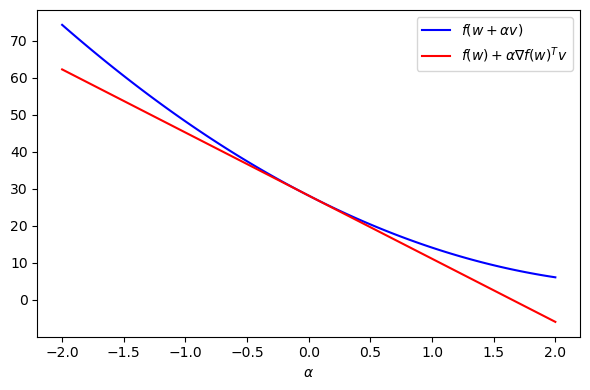

In [10]:
# gradient at w approximates f(w) near w
import matplotlib 
w = randn(d)
v = randn(d)
alphas = np.linspace(-2,2,100)
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(alphas, [f(w + alpha*v) for alpha in alphas], color='b', 
        label=r"$f(w + \alpha v)$")
ax.plot(alphas, [f(w) + alpha*gradf(w).dot(v) for alpha in alphas], color='r', 
        label=r"$f(w) + \alpha \nabla f(w)^T v$")
ax.set_xlabel(r"$\alpha$")
ax.legend()

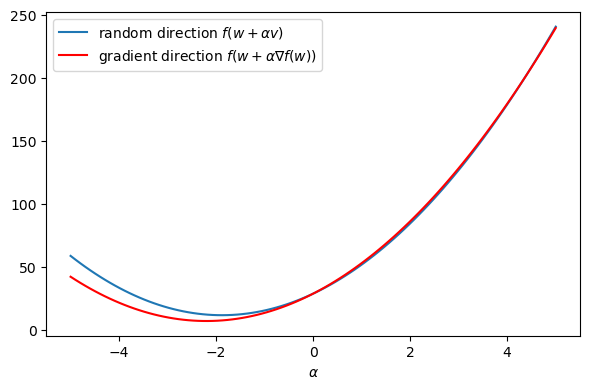

In [17]:
# function decreases fastest in the -∇f(w) direction
w = randn(d)
v = randn(d)
v_normalized = v/norm(v)
g = gradf(w)
g_normalized = g/norm(g)
alphas = np.linspace(-5,5,100)
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(alphas, [f(w + alpha*v_normalized) for alpha in alphas], 
     label = r"random direction $f(w+\alpha v)$")
ax.plot(alphas, [f(w + alpha*g_normalized) for alpha in alphas],color='r', 
      label= r"gradient direction $f(w + \alpha \nabla f(w))$")
ax.set_xlabel(r"$\alpha$")
ax.legend() 

# notice: compared to blue line, red line always goes down faster to the left and up faster to the right

# gradient descent

Text(0, 0.5, 'objective')

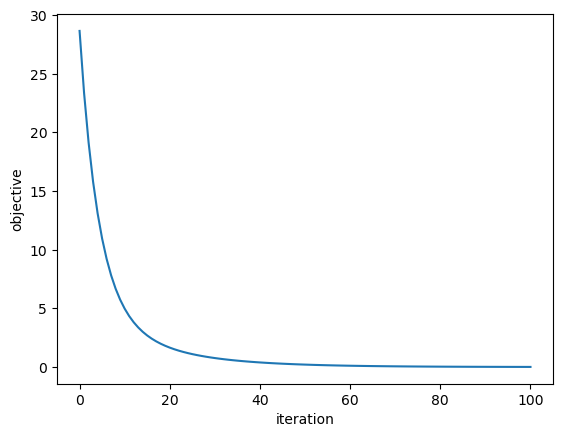

In [18]:
"""This function implements gradient descent for the function f with gradient ∇f"""
def gradient_descent(f, gradf,
                     alpha = .01,      # small constant step size - try other values!
                     w = randn(d),     # start at a random w
                     maxiters = 100    # maximum number of iterations 
                     ):
    fks = []          # a list to record all the values f(w) we see
    fks.append(f(w))  # record the initial value

    # start descending!
    for k in range(maxiters):
        w = w - alpha*gradf(w)        # take a gradient step
        fks.append(f(w))              # record its value
    return w, fks

w, fks = gradient_descent(f, gradf, alpha = .01)

plt.plot(fks, label="sum of square errors")
# plt.semilogy(fks, label="sum of square errors")
# plt.loglog(fks, label="sum of square errors")
plt.xlabel("iteration")
plt.ylabel("objective")

# Armijo rule

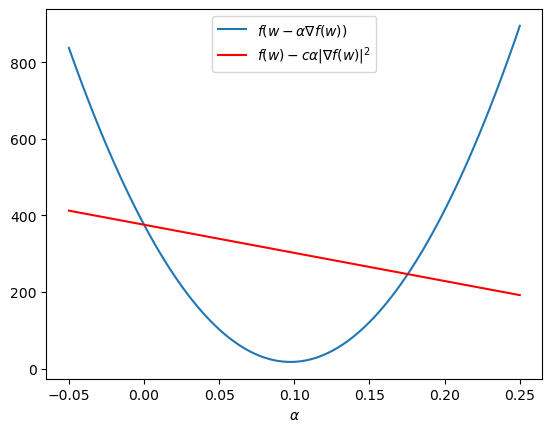

In [19]:
# function decreases fastest in the -∇f(w) direction
random.seed(1)

w = 5*np.ones(d)
g = gradf(w)
c = .1
alphas = .05*np.linspace(-1,5,100)
plt.plot(alphas, [f(w - alpha*g) for alpha in alphas], label = r"$f(w - \alpha \nabla f(w))$")
plt.plot(alphas, [f(w) - c*alpha*norm(g)**2 for alpha in alphas],color="r", label=r"$f(w) - c\alpha \|\nabla f(w)\|^2$")
plt.xlabel(r"$\alpha$")
plt.legend()

# Gradient descent with linesearch

Poll: gradient descent with linesearch will converge in ____ iterations than without
* A. more 
* B. fewer

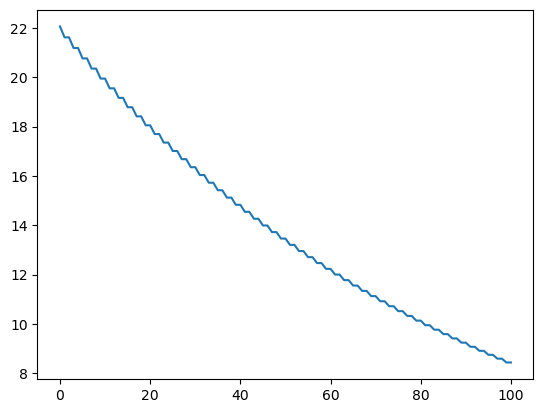

In [25]:
"""This function implements gradient descent with linesearch for the function f with gradient ∇f"""
def gradient_descent_linesearch(f, gradf,
            alpha = 1,        # initial step size - try other values!
            w = randn(d),     # start at a random w
            maxiters = 100,   # maximum number of iterations 
            c = .01           # Armijo sufficient decrease
            ):

    fks = []       # a list to record all the values f(w) we see
    fw = f(w)
    fks.append(fw) # record the initial value
    g = gradf(w)
    alpha0 = alpha

    # start descending!
    for k in range(maxiters):
        w_new = w - alpha*g      # take a gradient step
        fw_new = f(w_new)
        while fw_new > fw - c*alpha*norm(g)**2:
            alpha = alpha/2
            w_new = w - alpha*g      # take a gradient step
            fw_new = f(w_new)
        w, fw, g = w_new, fw_new, gradf(w)
        alpha = alpha0
        fks.append(fw)
    return w, fks

w, fks = gradient_descent_linesearch(f, gradf, alpha = 1, c = .01)

plt.plot(fks, label="sum of square errors")
# plt.semilogy(fks, label="sum of square errors")
# plt.loglog(fks, label="sum of square errors")

In [11]:
"""Quasi-Newton methods are a class of methods that use second-order information to speed up convergence."""
def quasi_newton(f, gradf,
                    w = randn(d),     # start at a random w
                    maxiters = 100,   # maximum number of iterations 
                    ):
    
        fks = []       # a list to record all the values f(w) we see
        fw = f(w)
        fks.append(fw) # record the initial value
        g = gradf(w)
        H = np.eye(d)
    
        # start descending!
        for k in range(maxiters):
            v = -H@g
            w_new = w + v      # take a gradient step
            fw_new = f(w_new)
            g_new = gradf(w_new)
            y = g_new - g
            s = w_new - w
            H = H + (y - H@s)@s.T/(s.T@s) - (H@s)@(y - H@s).T/(s.T@(y - H@s))
            w, fw, g = w_new, fw_new, g_new
            fks.append(fw)
        return w, fks           

In [12]:
# demonstate that quasi-Newton methods are faster than gradient descent
w, fks = gradient_descent(f, gradf, alpha = .01)
w, fks2 = quasi_newton(f, gradf)
plt.plot(fks, label="gradient descent")
plt.plot(fks2, label="quasi-Newton")

/var/folders/d9/7rmtq6715b16km7zjbcz7n680000gn/T/ipykernel_56646/3672207098.py:21: RuntimeWarning: overflow encountered in matmul
  H = H + (y - H@s)@s.T/(s.T@s) - (H@s)@(y - H@s).T/(s.T@(y - H@s))
/var/folders/d9/7rmtq6715b16km7zjbcz7n680000gn/T/ipykernel_56646/3672207098.py:21: RuntimeWarning: invalid value encountered in double_scalars
  H = H + (y - H@s)@s.T/(s.T@s) - (H@s)@(y - H@s).T/(s.T@(y - H@s))


ValueError: array must not contain infs or NaNs